In [1]:
from sklearn.model_selection import train_test_split
import torch
from data_prep import ready_data,feature_label,exit_Xy,ten_ready_data
import numpy as np
import matplotlib.pyplot as plt



In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [3]:
feature = 10
X,y,df = ten_ready_data('data_all',10,9,device,scale = 50)

tensor([[0.0000e+00, 1.0000e-03, 0.0000e+00, 3.4029e+02, 1.0130e+05, 0.0000e+00,
         2.8800e+02, 2.8815e+02, 1.0132e+05, 5.7141e-01],
        [3.0000e-03, 1.0000e-03, 0.0000e+00, 3.4029e+02, 1.0130e+05, 0.0000e+00,
         2.8800e+02, 2.8815e+02, 1.0132e+05, 7.2366e-01],
        [6.0000e-03, 1.0001e-03, 0.0000e+00, 3.4029e+02, 1.0130e+05, 0.0000e+00,
         2.8800e+02, 2.8815e+02, 1.0132e+05, 3.3418e+00],
        [9.0000e-03, 1.0001e-03, 0.0000e+00, 3.4029e+02, 1.0130e+05, 0.0000e+00,
         2.8800e+02, 2.8815e+02, 1.0132e+05, 4.9468e+00],
        [1.2000e-02, 1.0001e-03, 0.0000e+00, 3.4029e+02, 1.0130e+05, 0.0000e+00,
         2.8800e+02, 2.8815e+02, 1.0132e+05, 5.4262e+00]])


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.33, random_state=42)
dataset = {'train_input': X_train,'train_label': y_train,
            'test_input': X_test,'test_label': y_test}

In [5]:
X_train.shape

torch.Size([22061, 89])

In [6]:
from dl import Baseline,Bl,THdLin,three_layer,up_three_layer

In [7]:
in_,out_ = dataset['train_input'].shape[1],dataset['train_label'].shape[1]

#model = Baseline(in_dim = in_,out_dim = out_,embed_dim = 64,num_heads = 8,hidden_dim = 64,device=device)
#model = Bl(in_, out_,hid = 128,hid2 = 32,device=device)
model = up_three_layer(in_, out_,hid = 256,hid2 = 512,hid3= 256,device=device)

In [8]:
model.load_state_dict(torch.load('up_tree_weight.pth'))
model = model.to(device)

In [108]:
X,y = dataset['train_input'],dataset['train_label']
X_t,y_t = dataset['test_input'],dataset['test_label']

loss_history, loss_mape,Loss_mape_test,tube_loss_mape_test = model.fit(X,y,X_t,y_t,batch_size = 64,epochs = 1000,device=device)

Epoch 10, huber_train: 0.586390, mape_train: 0.262397, mape_test: 0.159600, tube_mape_test: 0.208521
Epoch 100, huber_train: 0.402533, mape_train: 0.121996, mape_test: 0.060743, tube_mape_test: 0.605871
Epoch 200, huber_train: 0.297408, mape_train: 0.059137, mape_test: 0.066358, tube_mape_test: 0.536763
Epoch 300, huber_train: 0.265445, mape_train: 0.044292, mape_test: 0.050533, tube_mape_test: 0.658231
Epoch 400, huber_train: 0.255521, mape_train: 0.040575, mape_test: 0.043591, tube_mape_test: 0.702770
Epoch 500, huber_train: 0.252055, mape_train: 0.039320, mape_test: 0.038376, tube_mape_test: 0.758443
Epoch 600, huber_train: 0.251182, mape_train: 0.039040, mape_test: 0.038077, tube_mape_test: 0.758075
Epoch 700, huber_train: 0.250970, mape_train: 0.038949, mape_test: 0.038033, tube_mape_test: 0.758811
Epoch 800, huber_train: 0.250961, mape_train: 0.038950, mape_test: 0.038060, tube_mape_test: 0.760099
Epoch 900, huber_train: 0.250863, mape_train: 0.038942, mape_test: 0.038047, tube_m

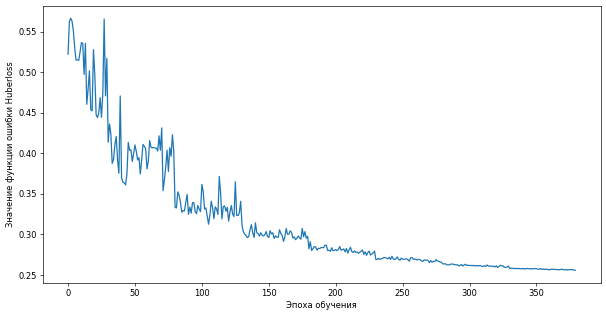

In [109]:
plt.figure(figsize=(12, 6), dpi=60)
plt.plot(loss_history[20:400])
plt.xlabel('Эпоха обучения')  # Подпись оси X
plt.ylabel('Значение функции ошибки Huberloss')  # Подпись оси Y
plt.show()

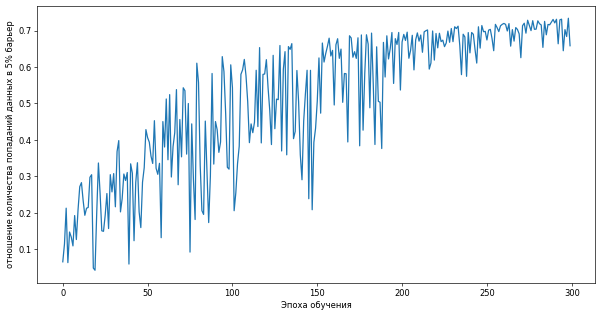

In [110]:
loss_mape,Loss_mape_test
plt.figure(figsize=(12, 6), dpi=60)
plt.plot(tube_loss_mape_test[0:300])
plt.xlabel('Эпоха обучения')  # Подпись оси X
plt.ylabel('отношение количества попаданий данных в 5% барьер')  # Подпись оси Y
plt.show()

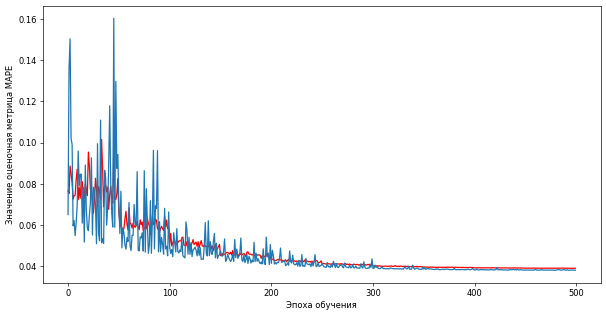

In [111]:
loss_mape,Loss_mape_test
plt.figure(figsize=(12, 6), dpi=60)
plt.plot(loss_mape[100:600],color = 'r')
plt.plot(Loss_mape_test[100:600])
plt.xlabel('Эпоха обучения')  # Подпись оси X
plt.ylabel('Значение оценочная метрица MAPE')  # Подпись оси Y
plt.show()

In [112]:
#torch.save(model.state_dict(), 'up_tree_weight.pth')

In [9]:
pred = model.forward(dataset['test_input']).to('cpu')

In [10]:
y_test_cpu = dataset['test_label'].to('cpu')

In [11]:
loss_data = torch.abs(y_test_cpu-pred)/y_test_cpu

In [12]:
loss_data.mean()

tensor(0.0430, grad_fn=<MeanBackward0>)

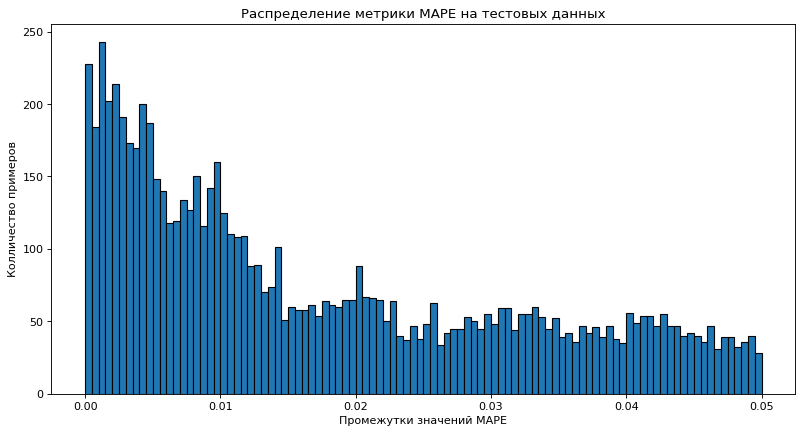

0.7103156344897396


In [13]:
# Convert loss_data to NumPy array
x = loss_data.detach().numpy()

all = x
chip = x[x<0.05]

plt.figure(figsize=(12, 6), dpi=80)
plt.hist(chip, bins=100, edgecolor='black')  # bins — количество корзин (можно настроить)
plt.xlabel('Промежутки значений MAPE')  # Подпись оси X
plt.ylabel('Колличество примеров')  # Подпись оси Y
plt.title('Распределение метрики MAPE на тестовых данных')  # Заголовок графика
plt.show()  # Отображение графика
print(len(chip)/len(all))

In [14]:
def sort_feat(df, model, device):
    all = {'rt':[],'pred':[],'x_true':[],'y_true':[]}
    print('df',len(df))
    for ma in np.arange(0, 1.01, 0.2):  # Диапазон для ma с шагом 0.05
        for att in range(0, 1501, 300):  # Диапазон для att с шагом 100
            # Фильтрация DataFrame по значениям в столбцах 2 и 5
            #print(df[5])
            temp_df = df[(df[2] == att) & (df[5] == ma)]
            #print(temp_df.shape)
            if temp_df.empty:
                
                continue  # Пропуск, если temp_df пуст
            
            feature = 10
            datset = feature_label(temp_df, feature)

            #X, y = exit_Xy(datset, feature, device, 9)  # Подготовка данных
            print(datset.shape)
            X,y = torch.tensor(datset[:,:,1:]),torch.tensor(datset[:,-1,-1])

            X = X.reshape(-1,feature*9).float().to(device)
            X = X[:,:-1]

            y = y.reshape(-1,1).float().to(device)
            #return X,y
            X = X.to(device)  # Убедитесь, что X на том же устройстве, что и модель
            
            pred = model.forward(X).to('cpu').reshape(-1)  # Прямой проход модели
            rt = np.array(temp_df[1])[feature-1:]  # Индекс 0 для соответствующего столбца
            с = 1
            # Построение графика
            all['rt'].append(rt)
            all['pred'].append(pred.detach().numpy())
            all['x_true'].append(temp_df[с])
            all['y_true'].append(temp_df.iloc[:, -1])
    
            plt.figure(figsize=(12, 6), dpi=60)
            plt.scatter(rt, pred.detach().numpy(), s=1, label='Предсказания модели') 
            plt.scatter(temp_df[с], temp_df.iloc[:, -1], color='r', s=0.04, label='Истинные значения') 
            plt.xlabel('топливо')  # Подпись оси X
            plt.ylabel('тяга')  # Подпись оси Y
            plt.title(f'max: {ma}, att: {att}\nКрасное: искомые значения\nСинее: выходные значения модели')  # Заголовок
            plt.legend()  # Легенда
            plt.show()
    return all

In [15]:
df.shape

(1792224, 10)

df 1792224
(5325, 10, 10)


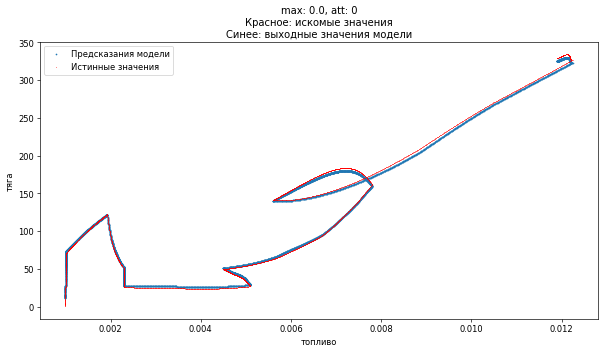

(5325, 10, 10)


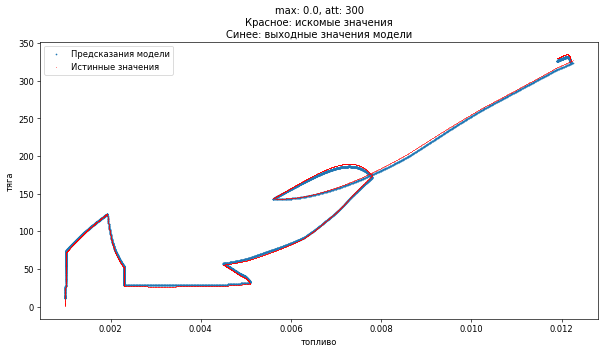

(5325, 10, 10)


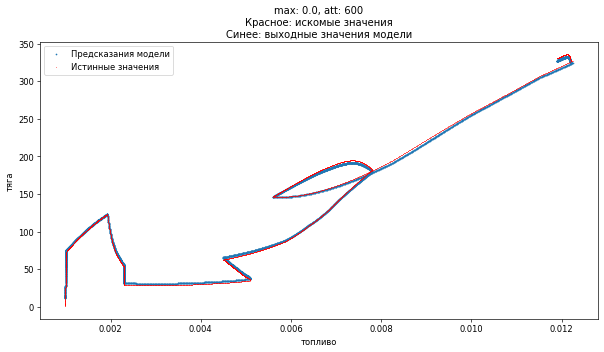

(5325, 10, 10)


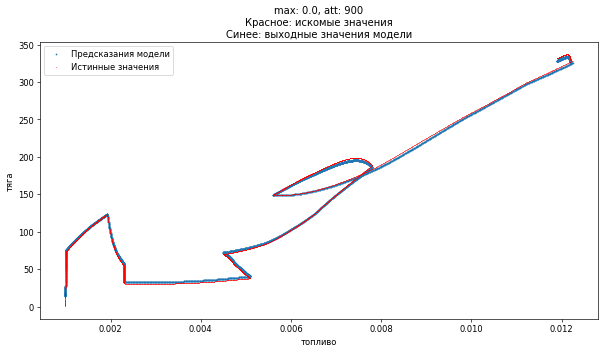

(5325, 10, 10)


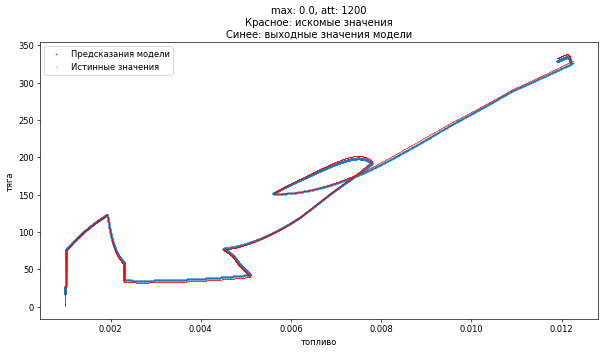

(5325, 10, 10)


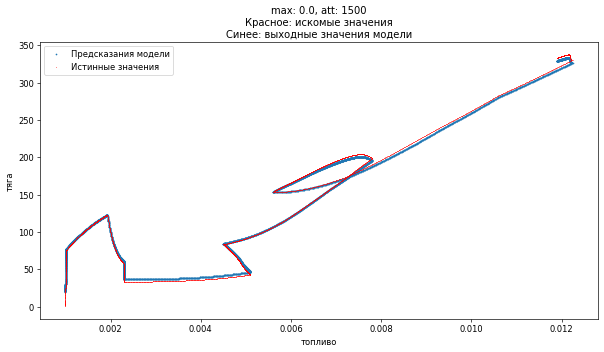

(5325, 10, 10)


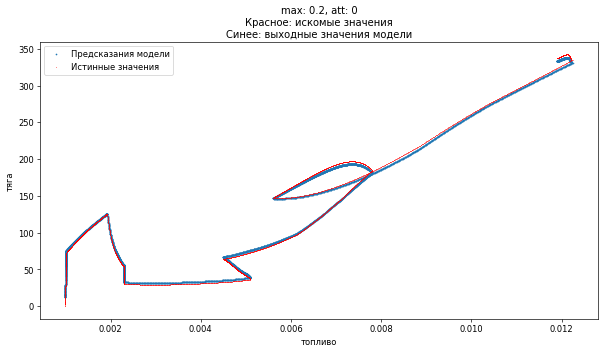

(5325, 10, 10)


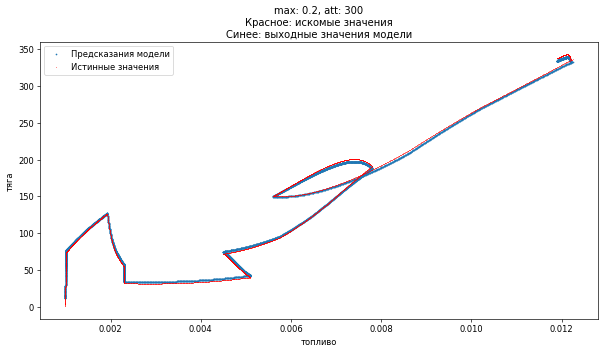

(5325, 10, 10)


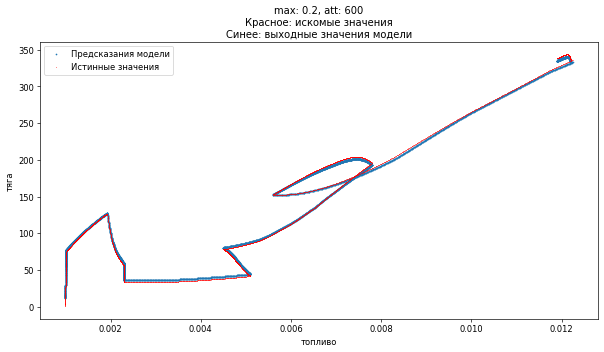

(5325, 10, 10)


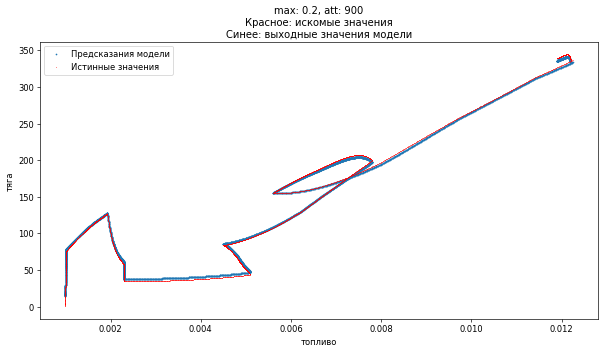

(5325, 10, 10)


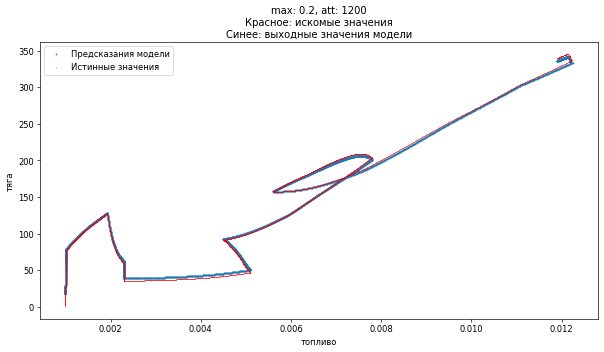

(5325, 10, 10)


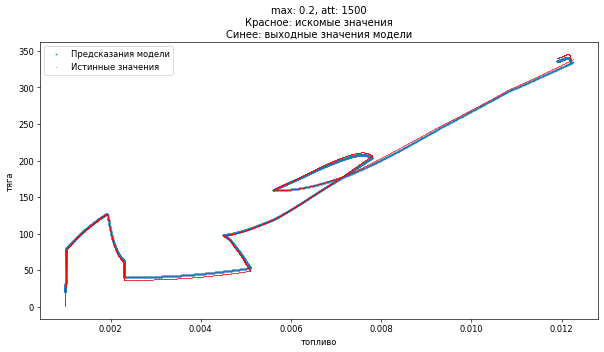

(5325, 10, 10)


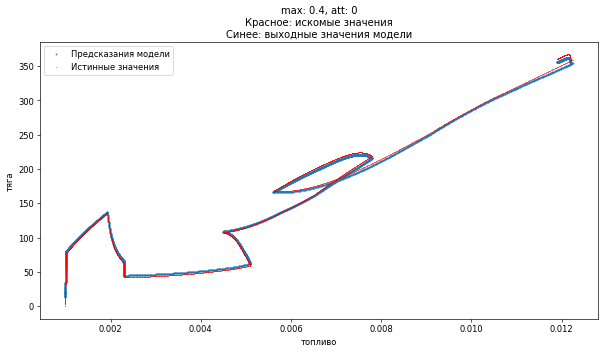

(5325, 10, 10)


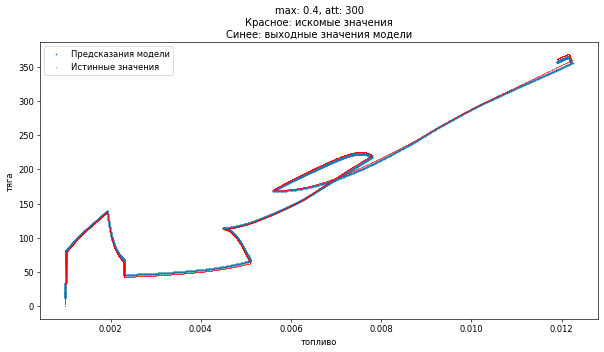

(5325, 10, 10)


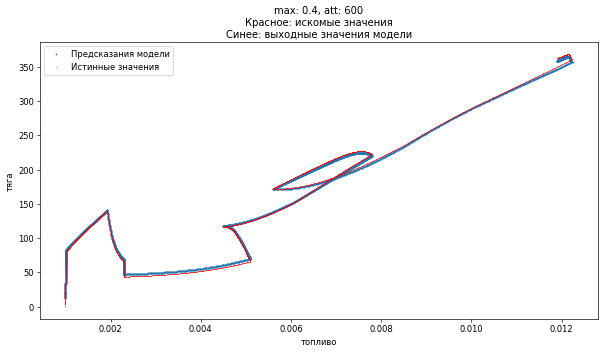

(5325, 10, 10)


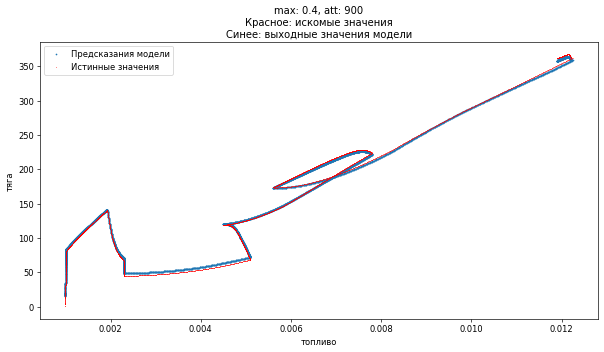

(5325, 10, 10)


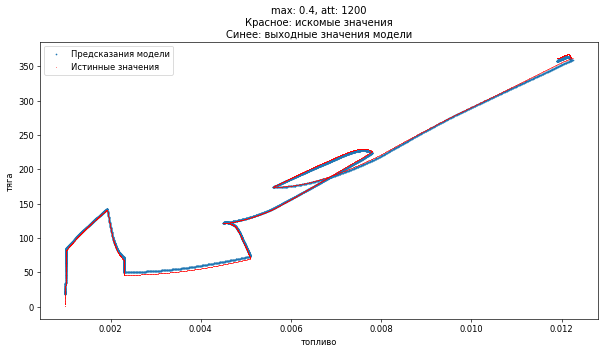

(5325, 10, 10)


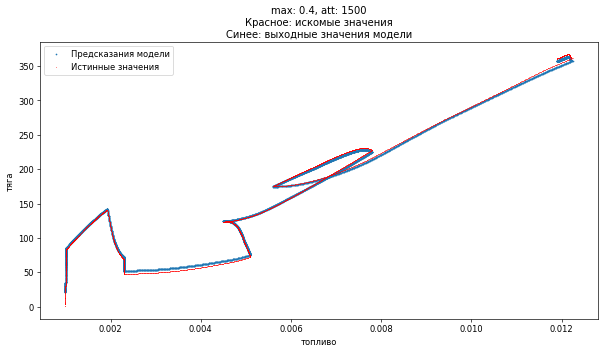

(5325, 10, 10)


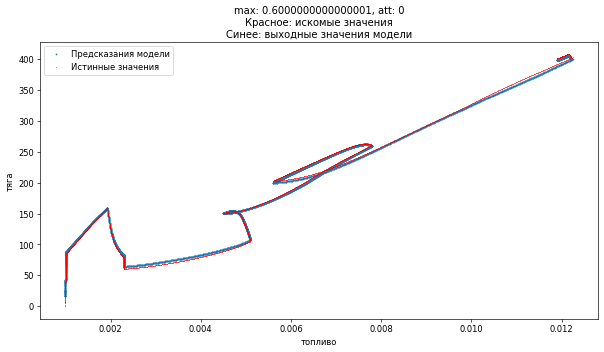

(5325, 10, 10)


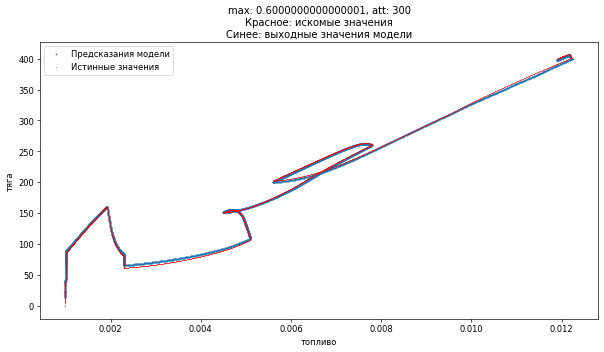

(5325, 10, 10)


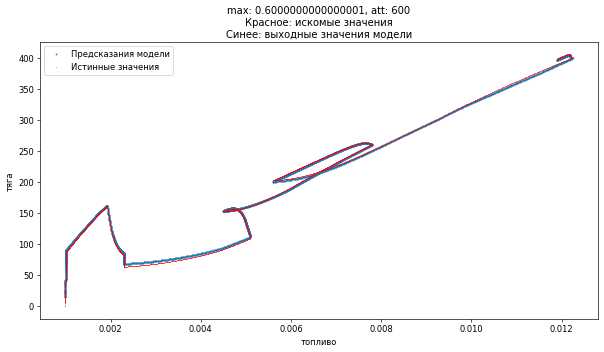

(5325, 10, 10)


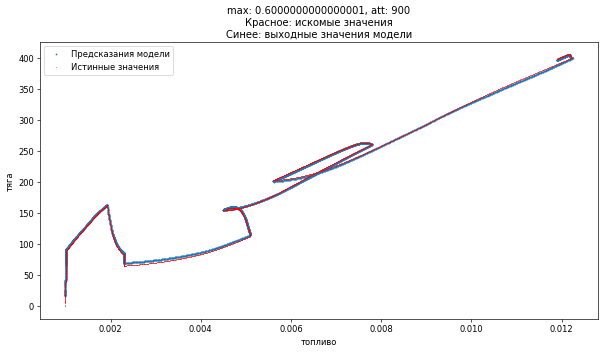

(5325, 10, 10)


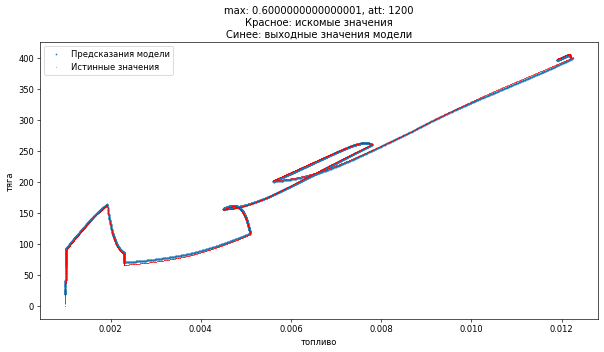

(5325, 10, 10)


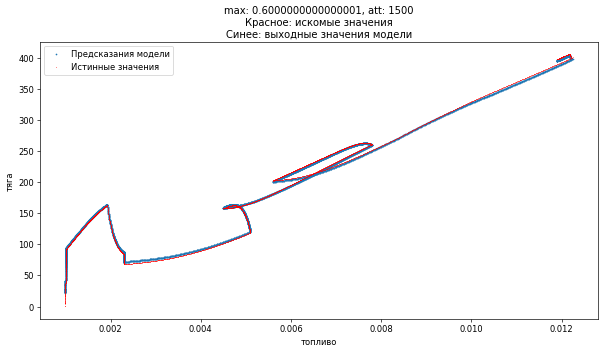

(5325, 10, 10)


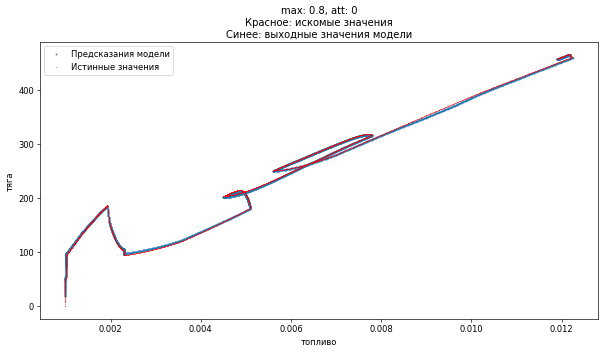

(5325, 10, 10)


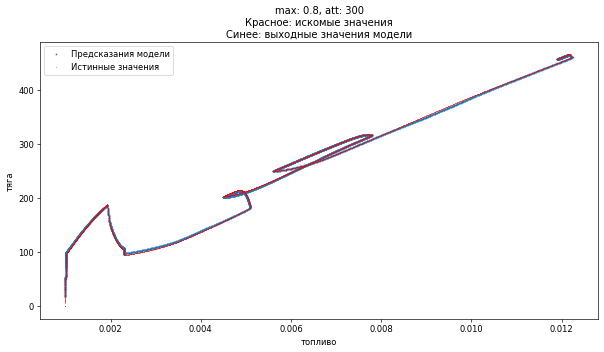

(5325, 10, 10)


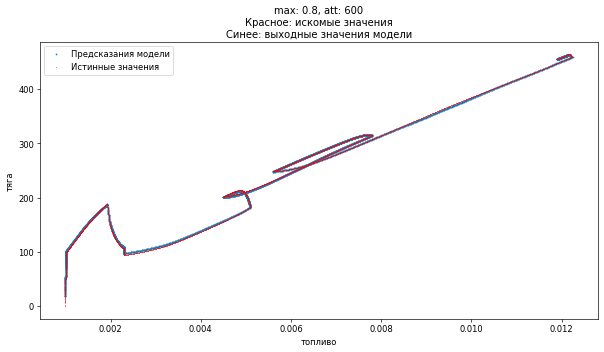

(5325, 10, 10)


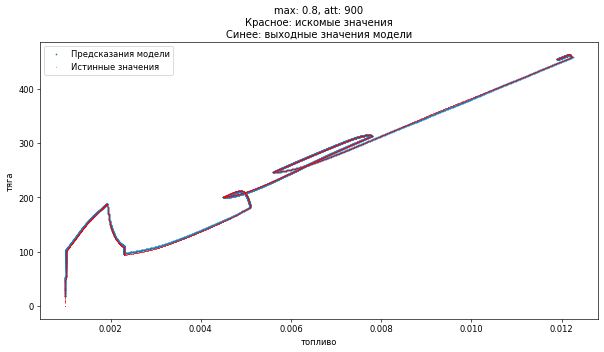

(5325, 10, 10)


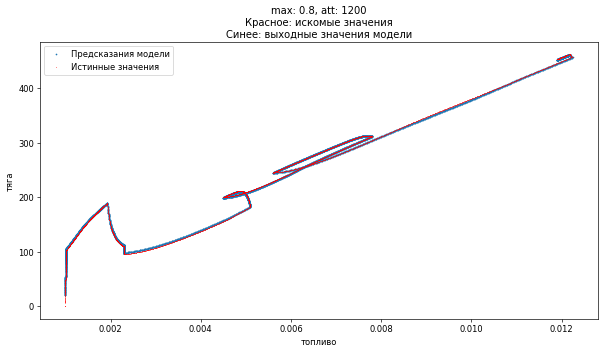

(5325, 10, 10)


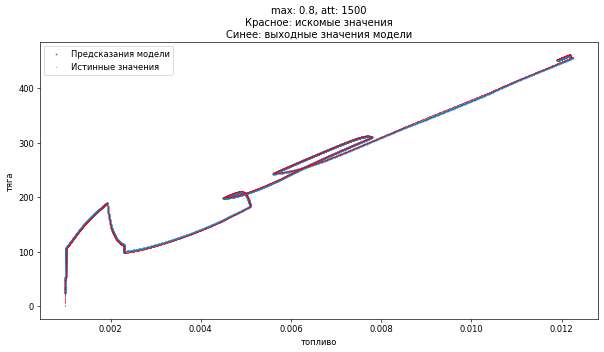

(5325, 10, 10)


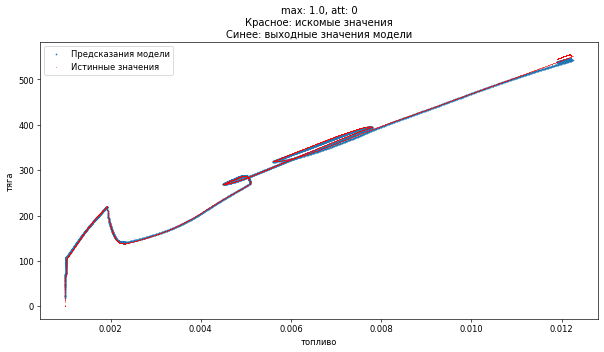

(5325, 10, 10)


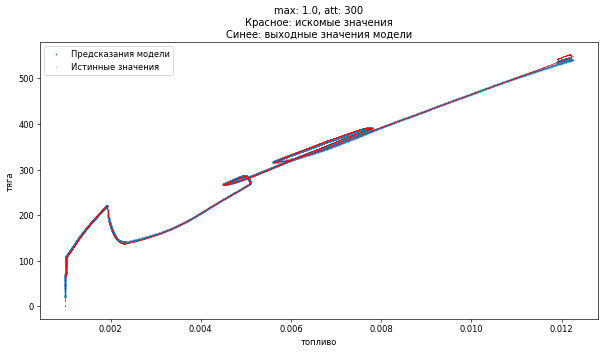

(5325, 10, 10)


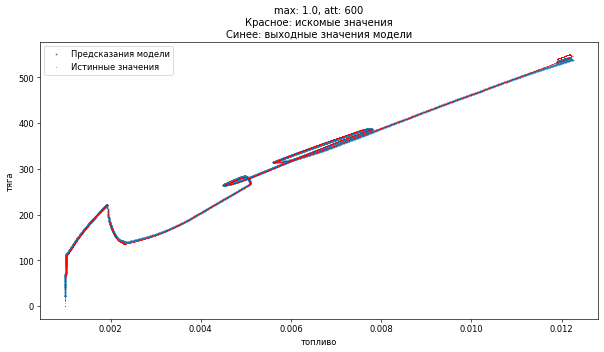

(5325, 10, 10)


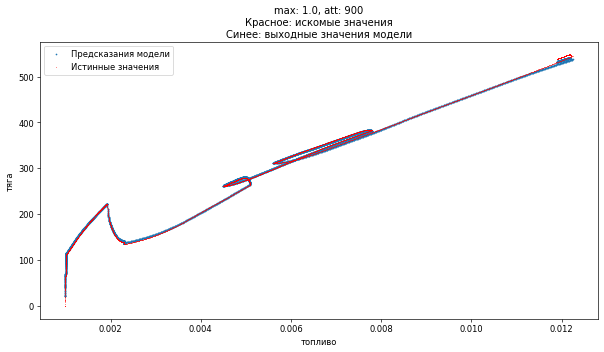

(5325, 10, 10)


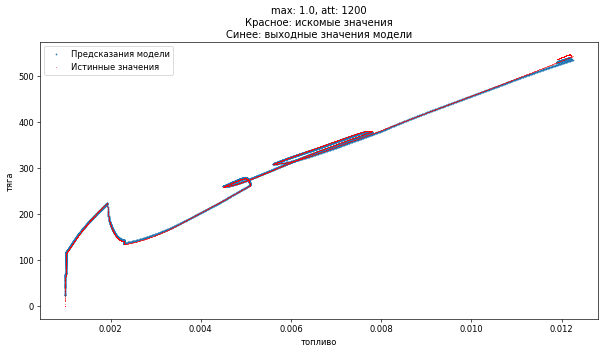

(5325, 10, 10)


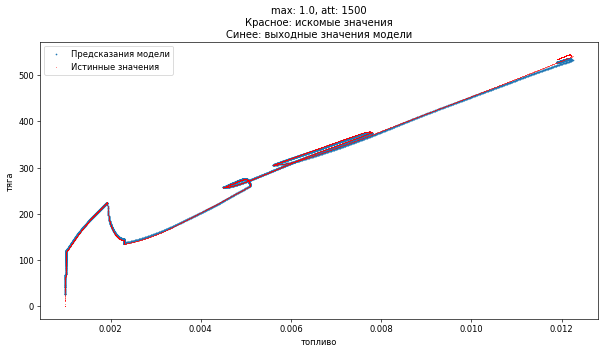

In [16]:
dt = sort_feat(df,model,device)
#print(dt['rt'][5],dt['pred'][5],dt['x_true'][5],dt['y_true'][5])
#print(len(dt['rt'][10]))

ТУТ НЕТ СМЫСЛА ПРОВЕРЯТЬ ПЕРЕХОДИТЕ К СЛЕДУЮЩЕМУ ПУНКТУ

In [17]:
feature = 10
datset = feature_label(df,feature)

X,y = exit_Xy(datset,feature,device,9)

KeyboardInterrupt: 

In [29]:
X.shape

torch.Size([35836, 89])

In [30]:
pred = model.forward(X).to('cpu').reshape(-1)

In [31]:
rt = np.array(df[0])[feature-1:]

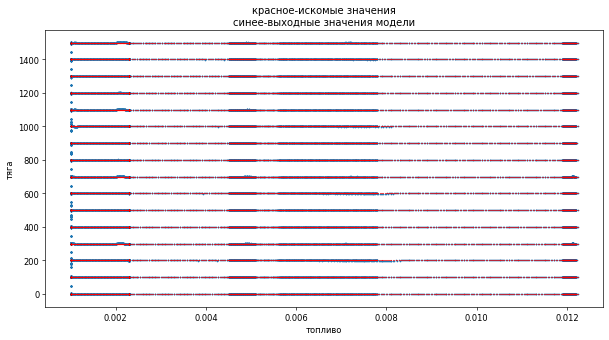

In [32]:
#plt.plot(df[0],df[1]) 
plt.figure(figsize=(12, 6), dpi=60)
plt.scatter(rt,pred.detach().numpy(),s=1) 
plt.scatter(df[0],df[1],color = 'r',s=0.1) 
plt.xlabel('топливо')  # Подпись оси X
plt.ylabel('тяга')  # Подпись оси Y
plt.title('красное-искомые значения\nсинее-выходные значения модели')  # Заголовок графика
plt.show()

СЛЕДУЮЩИЙ ПУНКТ

ЗДЕСЬ БУДЕТ ПРЕДСКАЗАНИЕ ЕСЛИ ЗАДАН ТОЛЬКО ПЕРВЫЙ МОМЕНТ ВРЕМЕНИ, ОСТАЛЬНЫЕ ТЯГИ САМОЛЕТА ПЕРЕДАЮТСЯ ИЗ ПРЕДСКАЗАНИЯ МОДЕЛИ

In [18]:
def req_step(model,df,input_x): 
    #print('input_x',input_x.shape)  
    predict = model(input_x).to(device)
    #print(predict.shape)
    prev = input_x[:,9:]
    #print(prev.shape)
    new_data = df
    #print(new_data.shape)

    cur = torch.cat((prev,predict,new_data),1)
    #print(cur.shape)
    return cur,predict

In [49]:
# можно выбрать attitute и махи
new_df_for = df[(df[2] == 500) & (df[5] == 0.7)][::50]

cur = torch.zeros((1, 10 * 9 - 1)).to(device)
#print(new_df_for.iloc[:9,1:])
# print(cur[:,:-8 ].shape)
# print(new_df_for.iloc[9][1:9].values.reshape(1,-1).shape)
# print(cur[:,-8: ].shape)
initt = torch.tensor(new_df_for.iloc[0,1:9].values, dtype=torch.float32).reshape(1,-1)
#print(new_inp.shape,initt.shape)
#cur[:,-8: ]= torch.tensor(new_df_for.iloc[0][1:9].values, dtype=torch.float32)
cur[:,:-8 ]= torch.tensor(new_df_for.iloc[:9,1:].values.reshape(1,-1), dtype=torch.float32)
cur[:,-8: ]= torch.tensor(new_df_for.iloc[9,1:9].values.reshape(1,-1), dtype=torch.float32)

data_predict = torch.empty(0).to(device)

In [50]:


for i in range(1, new_df_for.shape[0]):
    new_inp = torch.tensor(new_df_for.iloc[i][1:9].values, dtype=torch.float32).reshape(1,-1).to(device)
    cur, predict = req_step(model, new_inp, cur)
    data_predict = torch.cat((data_predict, predict))

In [51]:
data_predict.shape,new_df_for.shape

(torch.Size([106, 1]), (107, 10))

In [52]:
df_for_plot = new_df_for.copy()
placeholder = torch.tensor([[new_df_for.iloc[0, -1]]]) 

data_predict = data_predict.reshape(-1)

print(data_predict.shape) 


torch.Size([106])


In [53]:
x_rt = df_for_plot[1:][1]
y_rt = data_predict.to('cpu').detach().numpy()

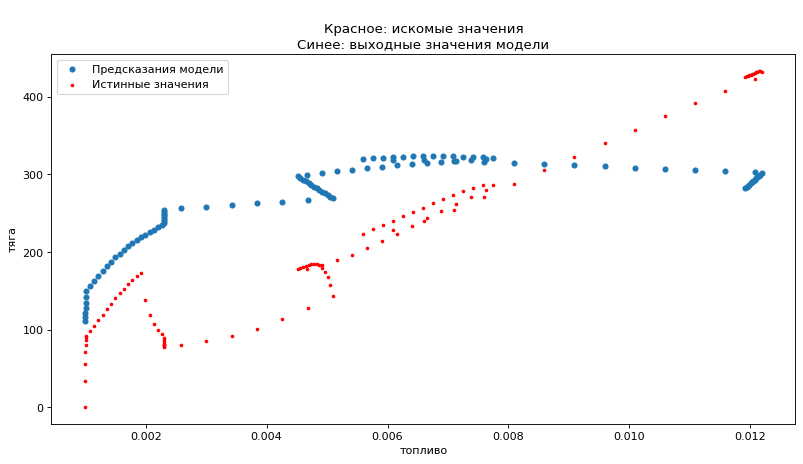

In [54]:
plt.figure(figsize=(12, 6), dpi=80)
plt.scatter(x_rt, y_rt, s=20, label='Предсказания модели') 
plt.scatter(new_df_for[1], new_df_for[9], color='r', s=5, label='Истинные значения') 
plt.xlabel('топливо')  
plt.ylabel('тяга')  
plt.title(f'\nКрасное: искомые значения\nСинее: выходные значения модели')  
plt.legend()  
plt.show()